In [1]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

from weighted_digraph import *
from test_weighted_digraph import *

In [2]:
sns.set_theme(style="whitegrid")

In [3]:
results = []

# Complete Graphs
 
 

In [4]:
for n in tqdm(list(range(10, 1000, 10))):
    g = generate_random_graph(n,1)

    for i in range(3):
        for name, alg in [('dijkstra', g.dijstrak), ('bellman_ford', g.bellman_ford), ('bellman_ford_queue', g.bellman_ford_queue)]:

            if name == 'bellman_ford' and n > 200:
                continue

            # Measure time
            start = time.time()
            alg(0)
            end = time.time()
            elapsed = end - start

            results.append({'n': n, 'time': elapsed, 'algorithm': name, 'run': i, 'graph':'complete'})

100%|██████████| 99/99 [01:31<00:00,  1.08it/s]


In [ ]:
df = pd.DataFrame(results)
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.scatterplot(data=df[df.graph=='complete'], x='n', y='time', hue='algorithm', ax=ax)
ax.set_title("Complete Graphs")
ax.set_ylabel("Time (s)")
plt.savefig('./tex/figs/complete_graphs.pdf', bbox_inches='tight')


In [7]:
for n in tqdm([5000]):
    g = generate_random_graph(n,1)

    for i in range(3):
        for name, alg in [('dijkstra', g.dijstrak)]:

            if name == 'bellman_ford' and n > 200:
                continue

            # Measure time
            start = time.time()
            alg(0)
            end = time.time()
            elapsed = end - start

            results.append({'n': n, 'time': elapsed, 'algorithm': name, 'run': i, 'graph':'complete'})

100%|██████████| 1/1 [00:35<00:00, 35.80s/it]


/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

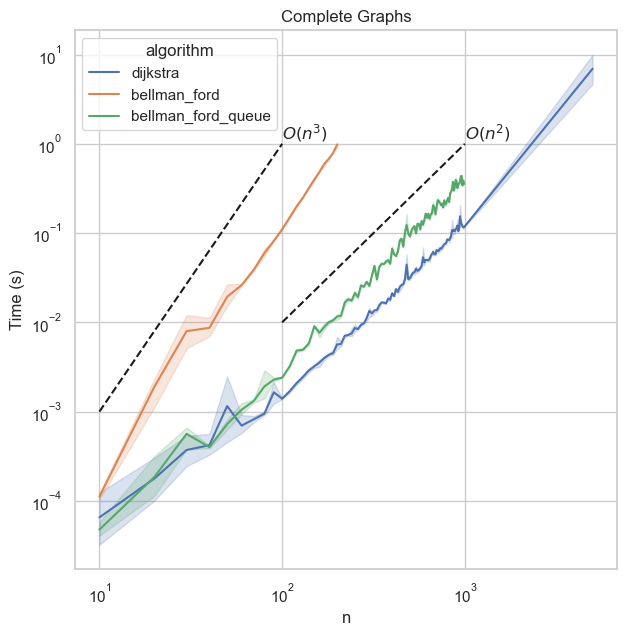

In [15]:
df = pd.DataFrame(results)
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.lineplot(data=df[df.graph=='complete'], x='n', y='time', hue='algorithm', ax=ax)
ax.set_title("Complete Graphs")
ax.set_ylabel("Time (s)")

ax.set_yscale('log')
ax.set_xscale('log')

# add O(n) dashed line
ax.plot([10**1, 10**2], [1/1000, 1], color='k', ls="--")
ax.text(10**2, 1, "$O(n^3)$", va="bottom", ha="left")

ax.plot([10**2, 10**3], [1/100, 1], color='k', ls="--", label="$O(n)$")
ax.text(10**3, 1, "$O(n^2)$", va="bottom", ha="left")

plt.savefig('./tex/figs/complete_graphs_log.pdf', bbox_inches='tight')


# DAGS

In [7]:
results = []
for n in tqdm(range(10, 1000, 10)):
    g, order = generate_dag(n)

    for i in range(3):
        for name, alg in [('dijkstra', g.dijstrak), ('bellman_ford_queue', g.bellman_ford_queue)]:
            if name == 'bellman_ford' and n > 200:
                continue
            # Measure time
            start = time.time()
            alg(order[0])
            end = time.time()
            elapsed = end - start

            results.append({'n': n, 'time': elapsed, 'algorithm': name, 'run': i, 'graph':'dag'})

        start = time.time()
        _, _, elapsed_core = g.dag_minimum_path()
        end = time.time()
        results.append({'n': n, 'time': end - start, 'algorithm': 'dag', 'run': i, 'graph':'dag'})
        results.append({'n': n, 'time': elapsed_core, 'algorithm': 'dag_no_postorder', 'run': i, 'graph':'dag'})

100%|██████████| 99/99 [00:27<00:00,  3.67it/s] 


In [8]:
df = pd.DataFrame(results)

/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

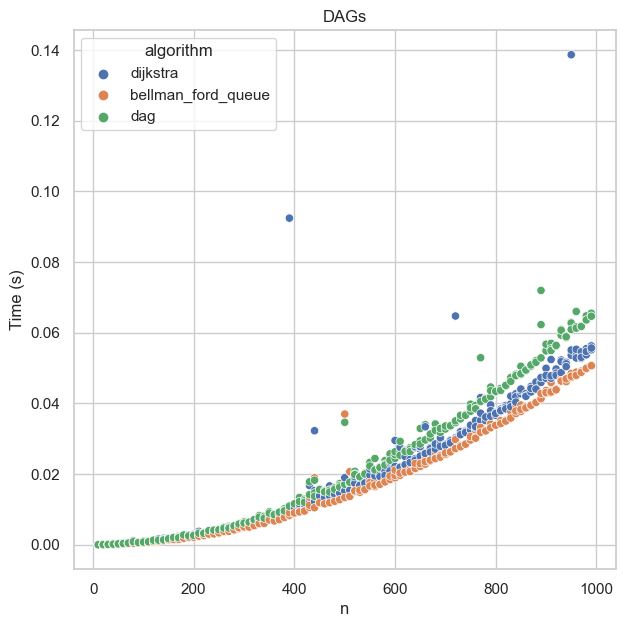

In [10]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=df[(df.graph == 'dag') & (df.algorithm != 'dag_no_postorder')], x='n', y='time', hue='algorithm', ax=ax)
ax.set_title("DAGs")
ax.set_ylabel("Time (s)")
plt.savefig('./tex/figs/dag_graphs_0.pdf', bbox_inches='tight')
plt.show()

/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

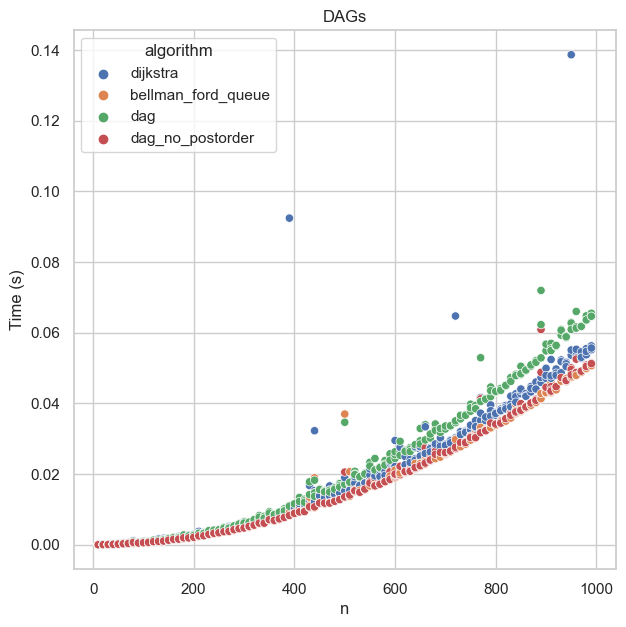

In [11]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=df[(df.graph == 'dag') ], x='n', y='time', hue='algorithm', ax=ax)
ax.set_title("DAGs")
ax.set_ylabel("Time (s)")
plt.savefig('./tex/figs/dag_graphs_1.pdf', bbox_inches='tight')
plt.show()

/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

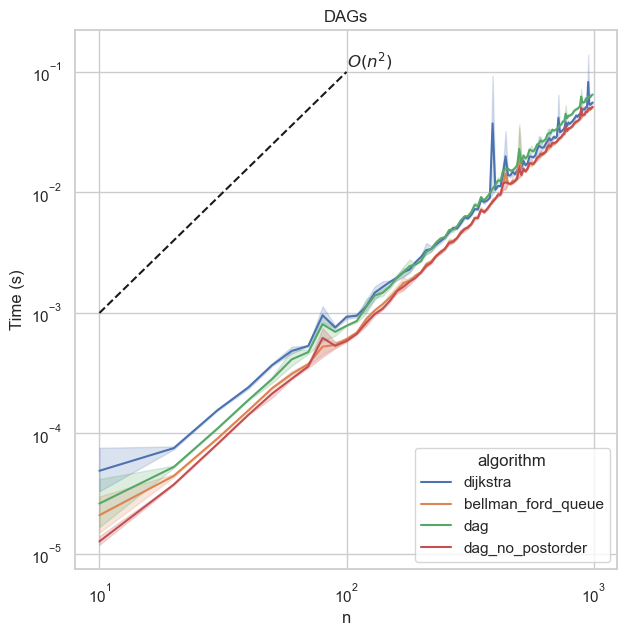

In [17]:
fig, ax = plt.subplots(figsize=(7,7))
sns.lineplot(data=df[df.graph == 'dag'], x='n', y='time', hue='algorithm', ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot([10**1, 10**2], [1/1000, 1/10], color='k', ls="--", label="$O(n)$")
ax.text(10**2, 1/10, "$O(n^2)$", va="bottom", ha="left")
ax.set_title("DAGs")
ax.set_ylabel("Time (s)")
plt.savefig('./tex/figs/dag_graphs_log.pdf', bbox_inches='tight')
plt.show()

# m = O(n)

In [19]:
results = []
for n in tqdm(range(10, 1000, 10)):
    for mult in [1,2,4]:
        k = n*mult
        g = generate_random_connected_graph(n, k)

        for i in range(3):
            for name, alg in [('dijkstra', g.dijstrak), ('bellman_ford', g.bellman_ford), ('bellman_ford_queue', g.bellman_ford_queue)]:
                # Measure time
                start = time.time()
                alg(0)
                end = time.time()
                elapsed = end - start

                results.append({'n': n, 'time': elapsed, 'algorithm': name, 'run': i, 'graph':f'm={mult+1}n'})

100%|██████████| 99/99 [02:15<00:00,  1.36s/it]


In [20]:
df = pd.DataFrame(results)

/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

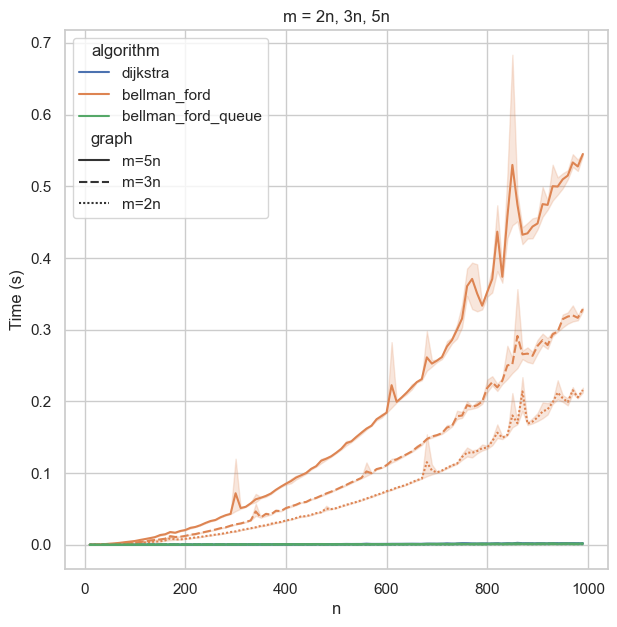

In [26]:
fig, ax = plt.subplots(figsize=(7,7))
sns.lineplot(data=df[df.graph.str.contains("m=")], x='n', y='time', hue='algorithm', style='graph', style_order=['m=5n', 'm=3n', 'm=2n'], ax=ax)
ax.set_ylabel("Time (s)")

ax.set_title("m = 2n, 3n, 5n")
plt.savefig("./tex/figs/m_linear.pdf", bbox_inches="tight")


plt.show()

In [22]:
for n in tqdm([10000]):
    for mult in [1,2,4]:
        k = n*mult
        g = generate_random_connected_graph(n, k)

        for i in range(3):
            for name, alg in [('dijkstra', g.dijstrak), ('bellman_ford_queue', g.bellman_ford_queue)]:
                # Measure time
                start = time.time()
                alg(0)
                end = time.time()
                elapsed = end - start

                results.append({'n': n, 'time': elapsed, 'algorithm': name, 'run': i, 'graph':f'm={mult+1}n'})

100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

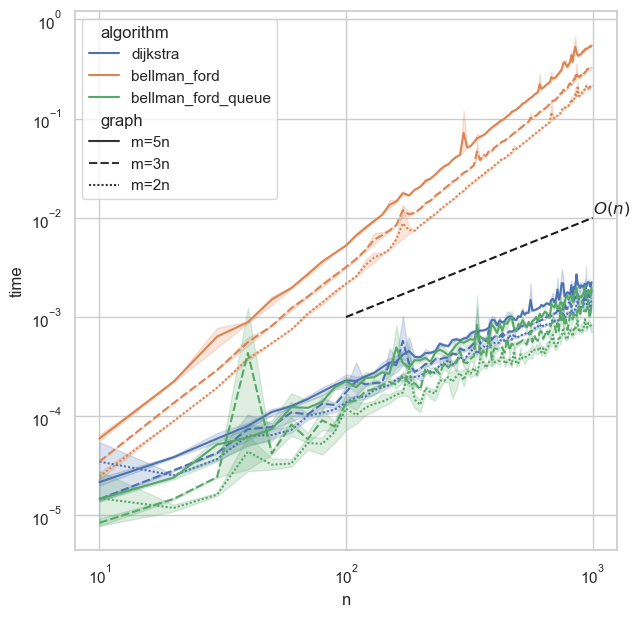

In [24]:
fig, ax = plt.subplots(figsize=(7,7))

sns.lineplot(data=df[df.graph.str.contains("m=")], x='n', y='time', hue='algorithm', style='graph', style_order=['m=5n', 'm=3n', 'm=2n'])
ax.set_yscale('log')
ax.set_xscale('log')

# add O(n) dashed line
ax.plot([10**2, 10**3], [1/1000, 1/100], color='k', ls="--", label="$O(n)$")
ax.text(10**3, 1/100, "$O(n)$", va="bottom", ha="left")

# ax.plot([10**2, 10**3], [1/10, 10], color='k', ls="--", label="$O(n)$")
# ax.text(10**3, 10, "$O(n^2)$", va="bottom", ha="left")

ax.set_title("m = 2n, 3n, 5n")
plt.savefig("./tex/figs/m_linear_log_0.pdf", bbox_inches="tight")


plt.show()

# Dijkstra Analysis

In [6]:
results_dijkstra = []
for n in tqdm(range(10, 200)):
    for mult in [2]:
        k = n*mult
        g = generate_random_connected_graph(n, k)

        print(f"n={n}, m={g.qtd_edge}")

        for i in range(3):
            for name, alg in [('dijkstra', g.dijstrak), ]:
                # Measure time
                start = time.time()
                alg(0)
                end = time.time()
                elapsed = end - start

                results_dijkstra.append({'n': n, 'time': elapsed, 'algorithm': name, 'run': i, 'graph':f'm={mult+1}n'})

100%|██████████| 190/190 [00:00<00:00, 1160.84it/s]

n=10, m=29
n=11, m=32
n=12, m=35
n=13, m=38
n=14, m=41
n=15, m=44
n=16, m=47
n=17, m=50
n=18, m=53
n=19, m=56
n=20, m=59
n=21, m=62
n=22, m=65
n=23, m=68
n=24, m=71
n=25, m=74
n=26, m=77
n=27, m=80
n=28, m=83
n=29, m=86
n=30, m=89
n=31, m=92
n=32, m=95
n=33, m=98
n=34, m=101
n=35, m=104
n=36, m=107
n=37, m=110
n=38, m=113
n=39, m=116
n=40, m=119
n=41, m=122
n=42, m=125
n=43, m=128
n=44, m=131
n=45, m=134
n=46, m=137
n=47, m=140
n=48, m=143
n=49, m=146
n=50, m=149
n=51, m=152
n=52, m=155
n=53, m=158
n=54, m=161
n=55, m=164
n=56, m=167
n=57, m=170
n=58, m=173
n=59, m=176
n=60, m=179
n=61, m=182
n=62, m=185
n=63, m=188
n=64, m=191
n=65, m=194
n=66, m=197
n=67, m=200
n=68, m=203
n=69, m=206
n=70, m=209
n=71, m=212
n=72, m=215
n=73, m=218
n=74, m=221
n=75, m=224
n=76, m=227
n=77, m=230
n=78, m=233
n=79, m=236
n=80, m=239
n=81, m=242
n=82, m=245
n=83, m=248
n=84, m=251
n=85, m=254
n=86, m=257
n=87, m=260
n=88, m=263
n=89, m=266
n=90, m=269
n=91, m=272
n=92, m=275
n=93, m=278
n=94, m=281
n=95

In [7]:
df_dijkstra = pd.DataFrame(results_dijkstra)

/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

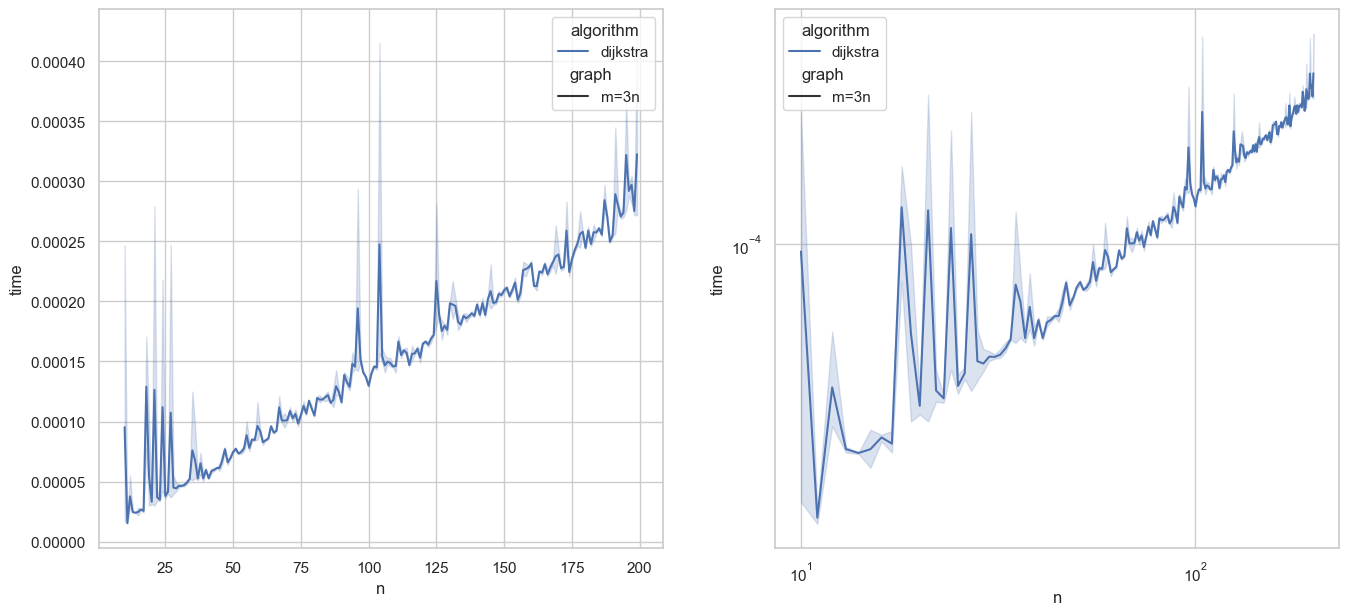

In [8]:

fig, axs = plt.subplots(1,2,figsize=(16,7))
sns.lineplot(data=df_dijkstra[df_dijkstra.graph.str.contains("m=")], x='n', y='time', hue='algorithm', style='graph', ax=axs[0])
sns.lineplot(data=df_dijkstra[df_dijkstra.graph.str.contains("m=")], x='n', y='time', hue='algorithm', style='graph', ax=axs[1])
axs[1].set_yscale('log')
axs[1].set_xscale('log')
plt.show()